In [1]:
import sys  
sys.path.insert(0, './')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
# df = pd.read_csv('../data/trades_round_1_day_-2_nn.csv', index_col='timestamp', delimiter=';')
df = pd.read_csv('../data/prices_round_1_day_-1.csv', index_col='timestamp', delimiter=';')
df.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-1,PEARLS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
0,-1,BANANAS,4951,1,4946.0,2.0,4945.0,29.0,4952,31,NaN,NaN,NaN,NaN,4951.5,0.000000
100,-1,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.000000
100,-1,BANANAS,4945,24,NaN,NaN,NaN,NaN,4952,24,NaN,NaN,NaN,NaN,4948.5,3.444336
200,-1,BANANAS,4945,20,NaN,NaN,NaN,NaN,4952,20,NaN,NaN,NaN,NaN,4948.5,3.795410


In [3]:
df_pearls = df.loc[df['product']=='PEARLS'][['mid_price']].rename(columns={'mid_price': 'pearls'})
df_bananas = df.loc[df['product']=='BANANAS'][['mid_price']].rename(columns={'mid_price': 'bananas'})
df = pd.concat([df_pearls, df_bananas], axis=1)
df.columns = pd.MultiIndex.from_product([['mid_price'], df.columns.tolist()])
df

mid_price        
             pearls bananas
timestamp                  
0           10003.0  4951.5
100         10000.0  4948.5
200         10000.0  4948.5
300         10000.0  4948.5
400         10000.0  4948.5
...             ...     ...
999500      10002.0  4894.0
999600      10002.0  4894.0
999700      10000.0  4890.5
999800       9998.5  4893.5
999900      10000.0  4895.0

[10000 rows x 2 columns]

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

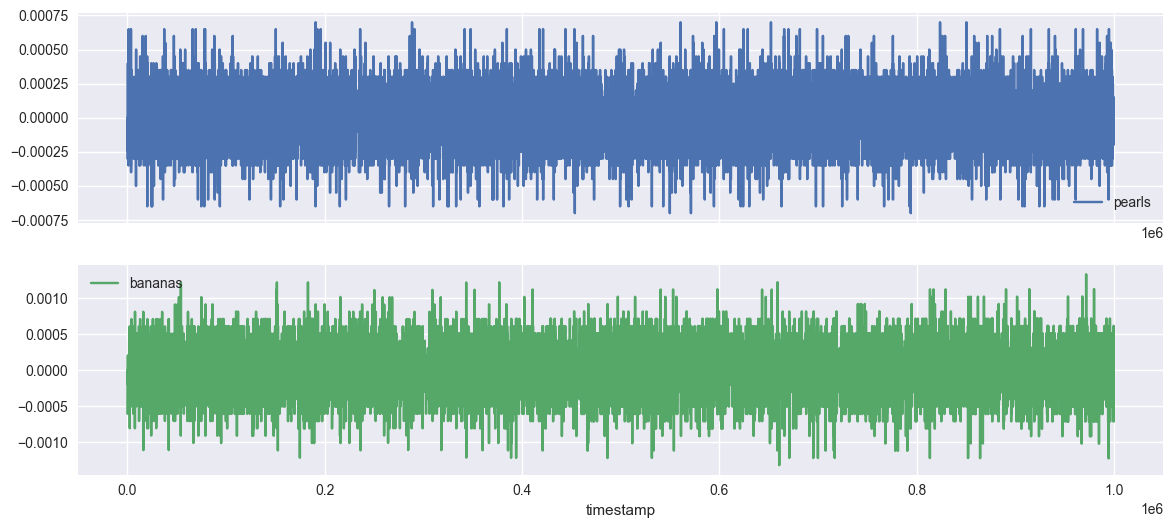

In [4]:
returns = np.log(df['mid_price']/ df['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

array([[<Axes: xlabel='pearls', ylabel='pearls'>,
        <Axes: xlabel='bananas', ylabel='pearls'>],
       [<Axes: xlabel='pearls', ylabel='bananas'>,
        <Axes: xlabel='bananas', ylabel='bananas'>]], dtype=object)

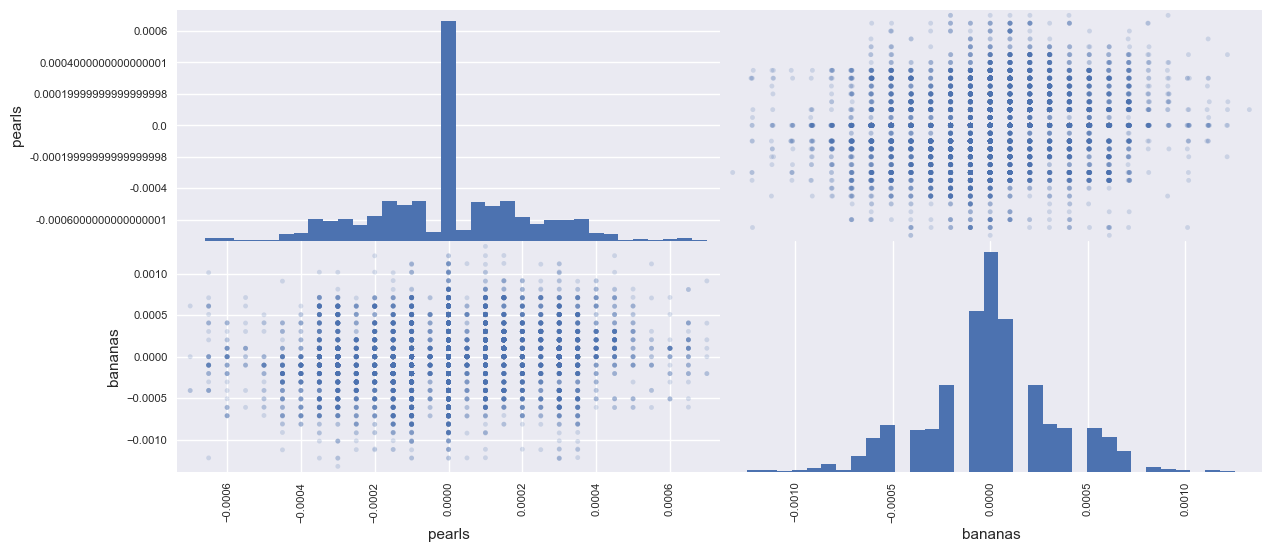

In [5]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

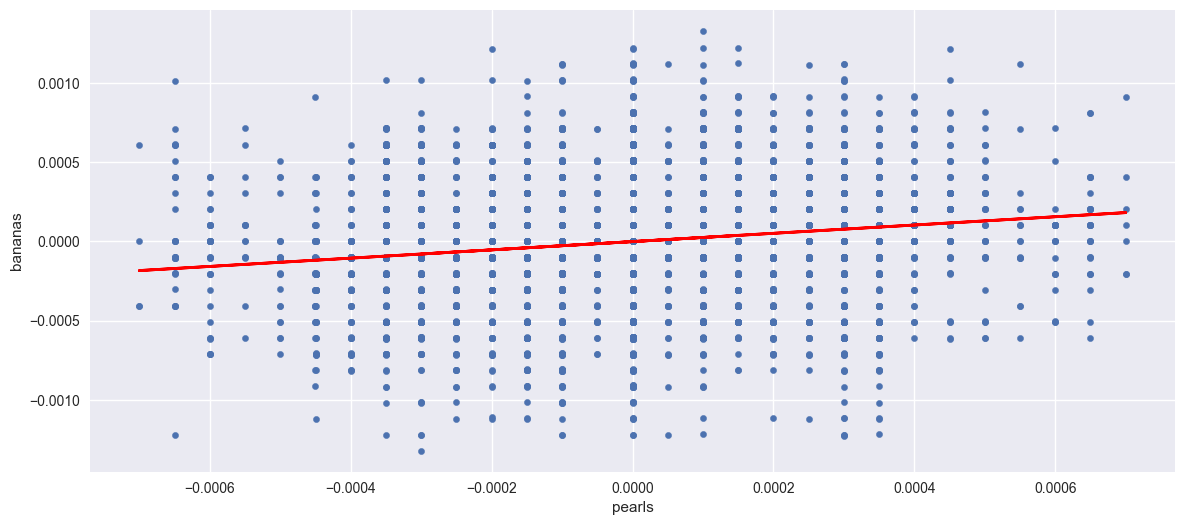

In [6]:
regression = np.polyfit(returns['pearls'], returns['bananas'], deg=1)

ax = returns.plot(kind='scatter', x= 'pearls', y='bananas', figsize=(14,6))
ax.plot(returns['pearls'], np.polyval(regression, returns['pearls']), 'r', lw=2)

In [7]:
returns.corr()

,pearls,bananas
pearls,1.000000,0.159836
bananas,0.159836,1.000000


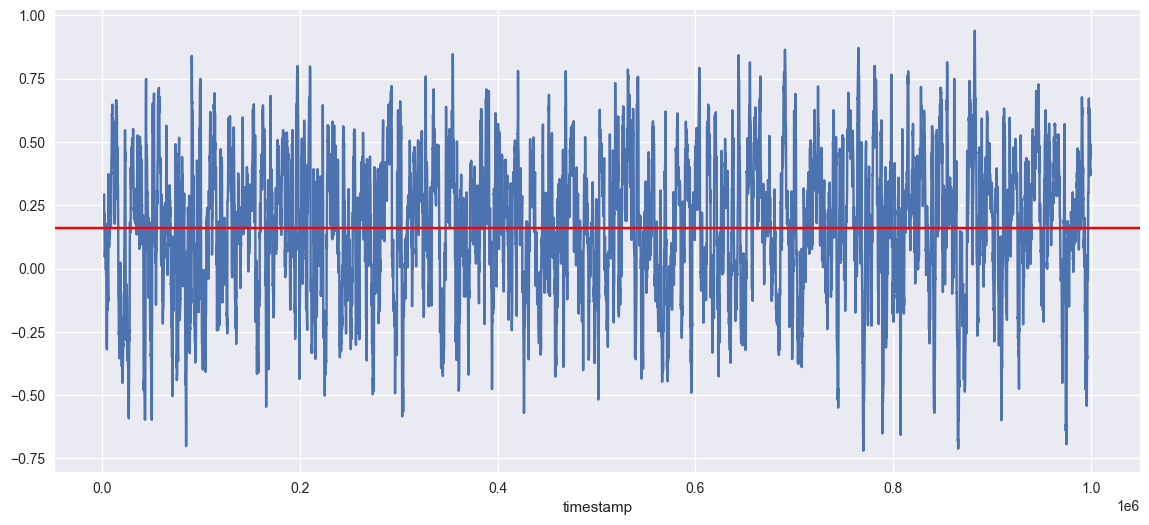

In [8]:
ax = returns['pearls'].rolling(window=20).corr(returns['bananas']).plot(figsize=(14,6))
ax.axhline(returns.corr().iloc[0,1], c='r')